Current Stock Price: 437.5

===== TOP GAMMA STRIKES =====
    strike  gamma_score
59   430.0      76778.0
63   440.0      44166.0
65   445.0      35621.0
67   450.0      32555.0
61   435.0      24033.0
64   442.5      17172.0
71   460.0      16912.0
66   447.5      16257.0
75   470.0      14441.0
74   467.5      12392.0


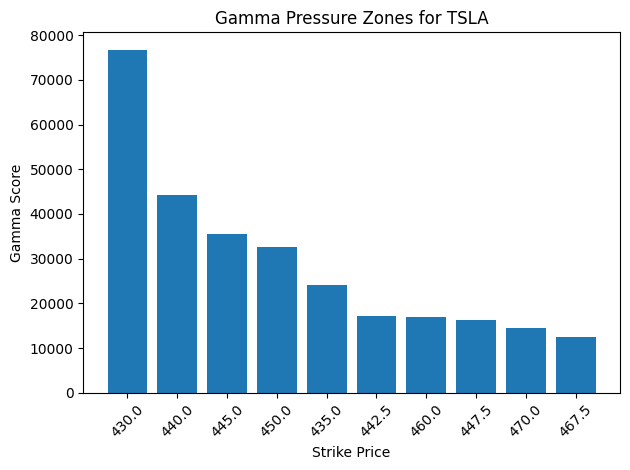

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
stock_symbol = "TSLA"   # change if you want
ticker = yf.Ticker(stock_symbol)

# =========================
# FETCH OPTION DATA
# =========================
expiry = ticker.options[0]
option_chain = ticker.option_chain(expiry)
calls = option_chain.calls

# Fix NaN volume
calls['volume'] = calls['volume'].fillna(0)

# Current stock price
current_price = ticker.history(period="1d")['Close'].iloc[-1]
print("Current Stock Price:", current_price)

# =========================
# FILTER ATM ZONE
# =========================
atm_calls = calls[
    (calls['strike'] >= current_price - 50) &
    (calls['strike'] <= current_price + 50)
].copy()

# =========================
# GAMMA SCORE
# =========================
atm_calls['gamma_score'] = atm_calls['volume'] * (atm_calls['openInterest'] + 1)

# Sort top 10 gamma strikes
top_gamma = atm_calls.sort_values(by='gamma_score', ascending=False).head(10)

print("\n===== TOP GAMMA STRIKES =====")
print(top_gamma[['strike', 'gamma_score']])

# =========================
# VISUALIZATION
# =========================
plt.figure()
plt.bar(top_gamma['strike'].astype(str), top_gamma['gamma_score'])
plt.xlabel("Strike Price")
plt.ylabel("Gamma Score")
plt.title(f"Gamma Pressure Zones for {stock_symbol}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
